In [1]:
import pandas as pd

In [67]:
file_path = "Poem_Data.csv"
data = pd.read_csv(file_path)
print("Dataset Preview:")
print(data.head())
print("\nColumn Names:")
print(data.columns)
print("\nDataset Info:")
data.info()

Dataset Preview:
   PromptID                                         PromptText  \
0         1  Write a Shakespearean sonnet \nabout courage s...   
1         2  Write a Shakespearean sonnet \nabout wonder se...   
2         3  Write a Shakespearean sonnet \nabout loss set ...   

                            Llama 3.2 3B Instruct Q8  \
0  Fair battlefield, where valorous hearts do lie...   
1  Fairest cosmos, thou dost stretch thy might,\n...   
2  In vacant halls, where echoes whisper low,\nA ...   

                              Mistral 7B INSTRUCT Q4  \
0  Upon the field of battle, where chaos reigns,\...   
1  In the vast expanse of the cosmos, where stars...   
2  In the empty home, where laughter once was hea...   

                                       Gemma 2 2B Q4  \
0  Upon the field of strife, where blood doth sta...   
1  Upon the velvet canvas of the night,\nA millio...   
2  The dust motes dance in sunbeams, pale and thi...   

                                QWEN2 7B In

In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.translate.meteor_score import meteor_score
import textstat
import pandas as pd
from collections import Counter
import math

# Download required NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

# Metrics
def lexical_diversity(text):
    """
    Calculate lexical diversity for a given text.
    """
    tokens = word_tokenize(text)
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

def readability_score(text):
    """
    Calculate Flesch reading ease score for a given text.
    """
    return textstat.flesch_reading_ease(text)

def sentiment_analysis(text):
    """
    Perform sentiment analysis on a given text using VADER.
    """
    analyzer = SentimentIntensityAnalyzer()
    vader_scores = analyzer.polarity_scores(text)
    if vader_scores['compound'] >= 0.05:
        return 'Positive'
    elif vader_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to evaluate poems for all models
def evaluate_poems(data):
    """
    Evaluate poems for all models and compute various metrics.
    """
    model_columns = data.columns.difference(["PromptID", "PromptText", "ReferencePoem"])
    all_results = []

    for model_name in model_columns:
        for _, row in data.iterrows():
            prompt_id = row["PromptID"]
            prompt_text = row["PromptText"]
            reference_poem = row["ReferencePoem"]
            generated_poem = row[model_name]

            if not isinstance(generated_poem, str) or not isinstance(reference_poem, str):
                continue  # Skip invalid data
            # Calculate metrics
            all_results.append({
                "Model": model_name,
                "PromptID": prompt_id,
                "PromptText": prompt_text,
                "Lexical Diversity": lexical_diversity(generated_poem),
                "Readability Score": readability_score(generated_poem),
                "Sentiment": sentiment_analysis(generated_poem)
            })
    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results)

    return results_df

# Evaluate poems
evaluation_results= evaluate_poems(data)

# Display results
print("Evaluation Results:")
print(evaluation_results)

[nltk_data] Downloading package punkt to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Evaluation Results:
                       Model  PromptID  \
0           Code Ninja 7B Q4         1   
1           Code Ninja 7B Q4         2   
2           Code Ninja 7B Q4         3   
3              Gemma 2 2B Q4         1   
4              Gemma 2 2B Q4         2   
5              Gemma 2 2B Q4         3   
6   Llama 3.2 3B Instruct Q8         1   
7   Llama 3.2 3B Instruct Q8         2   
8   Llama 3.2 3B Instruct Q8         3   
9     Mistral 7B INSTRUCT Q4         1   
10    Mistral 7B INSTRUCT Q4         2   
11    Mistral 7B INSTRUCT Q4         3   
12           Openchat-3.5 7B         1   
13           Openchat-3.5 7B         2   
14           Openchat-3.5 7B         3   
15      QWEN2 7B Instruct Q4         1   
16      QWEN2 7B Instruct Q4         2   
17      QWEN2 7B Instruct Q4         3   

                                           PromptText  Lexical Diversity  \
0   Write a Shakespearean sonnet \nabout courage s...               0.64   
1   Write a Shakespearean son

In [53]:
from IPython.display import display
import pandas as pd

# Display full table with options
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.float_format", "{:.2f}".format)  # Format float values

# Display the evaluation results as a table
display(evaluation_results)


,Model,PromptID,PromptText,Lexical Diversity,Readability Score,Sentiment
0,Code Ninja 7B Q4,1,Write a Shakespearean sonnet \nabout courage s...,0.64,93.64,Positive
1,Code Ninja 7B Q4,2,Write a Shakespearean sonnet \nabout wonder se...,0.69,72.29,Positive
2,Code Ninja 7B Q4,3,Write a Shakespearean sonnet \nabout loss set ...,0.72,88.26,Negative
3,Gemma 2 2B Q4,1,Write a Shakespearean sonnet \nabout courage s...,0.59,69.15,Negative
4,Gemma 2 2B Q4,2,Write a Shakespearean sonnet \nabout wonder se...,0.62,71.18,Positive
5,Gemma 2 2B Q4,3,Write a Shakespearean sonnet \nabout loss set ...,0.61,89.48,Positive
6,Llama 3.2 3B Instruct Q8,1,Write a Shakespearean sonnet \nabout courage s...,0.56,74.36,Positive
7,Llama 3.2 3B Instruct Q8,2,Write a Shakespearean sonnet \nabout wonder se...,0.53,67.62,Positive
8,Llama 3.2 3B Instruct Q8,3,Write a Shakespearean sonnet \nabout loss set ...,0.55,67.93,Negative
9,Mistral 7B INSTRUCT Q4,1,Write a Shakespearean sonnet \nabout courage s...,0.46,81.12,Positive


In [73]:
filtered_results = evaluation_results[evaluation_results["Model"] != "ReferencePoem"]

columns_to_average = ["Lexical Diversity", "Readability Score"]

average_scores = filtered_results.groupby("Model")[columns_to_average].mean()

average_scores.reset_index(inplace=True)

from IPython.display import display
display(average_scores)


,Model,Lexical Diversity,Readability Score
0,Code Ninja 7B Q4,0.69,84.73
1,Gemma 2 2B Q4,0.61,76.60
2,Llama 3.2 3B Instruct Q8,0.55,69.97
3,Mistral 7B INSTRUCT Q4,0.40,80.11
4,Openchat-3.5 7B,0.69,72.35
5,QWEN2 7B Instruct Q4,0.74,82.80


##### Highest Lexical Diversity:
* QWEN2 7B Instruct Q4 has the highest average lexical diversity at 0.74, suggesting it uses the most variety in vocabulary.
##### Highest Readability Score:
* Code Ninja 7B Q4 has the highest average readability score at 84.73, indicating it is the easiest to read among the models listed.

In [83]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load pre-trained SentenceTransformer model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Iterate over prompts and generate heatmaps
for prompt_id in data["PromptID"].unique():
    # Filter data for the current prompt
    prompt_data = data[data["PromptID"] == prompt_id]

    # Prepare data for embedding
    poems = []
    models_list = []
    for model_name in prompt_data.columns.difference(["PromptID", "PromptText", "ReferencePoem"]):
        poems.append(prompt_data[model_name].iloc[0])
        models_list.append(model_name)

    # Encode poems
    embeddings = model.encode(poems)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(embeddings)

    # Create a similarity DataFrame
    similarity_df = pd.DataFrame(cosine_sim, index=models_list, columns=models_list)
    #print(f"Cosine Similarity values for Prompt ID {prompt_id}")
    #print(similarity_df)
    # Generate and save the heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title(f"Cosine Similarity for Prompt ID {prompt_id}")
    plt.ylabel("Models")
    plt.xlabel("Models")
    
    # Save the plot as an image file
    plot_filename = f"heatmap_prompt_{prompt_id}.png"
    plt.savefig(plot_filename, bbox_inches='tight')  # Ensure all parts of the plot are saved
    plt.close()  # Close the plot to free memory
    print(f"Saved heatmap as {plot_filename}")


Cosine Similarity values for Prompt ID 1
                          Code Ninja 7B Q4  Gemma 2 2B Q4  \
Code Ninja 7B Q4                      1.00           0.66   
Gemma 2 2B Q4                         0.66           1.00   
Llama 3.2 3B Instruct Q8              0.61           0.76   
Mistral 7B INSTRUCT Q4                0.77           0.70   
Openchat-3.5 7B                       0.63           0.78   
QWEN2 7B Instruct Q4                  0.73           0.67   

                          Llama 3.2 3B Instruct Q8  Mistral 7B INSTRUCT Q4  \
Code Ninja 7B Q4                              0.61                    0.77   
Gemma 2 2B Q4                                 0.76                    0.70   
Llama 3.2 3B Instruct Q8                      1.00                    0.62   
Mistral 7B INSTRUCT Q4                        0.62                    1.00   
Openchat-3.5 7B                               0.76                    0.65   
QWEN2 7B Instruct Q4                          0.70             

##### Prompt ID 1: 
* Models show high semantic similarity, with Mistral 7B INSTRUCT Q4, Code Ninja 7B Q4, and Gemma 2 2B Q4 closely aligned. Minor semantic divergence exists among other models.
##### Prompt ID 2: 
* Models exhibit strong semantic alignment, with Code Ninja 7B Q4 and Gemma 2 2B Q4 having the highest similarity (0.72). Variance exists in other models, but the overall alignment is consistent.
##### Prompt ID 3: 
* Openchat-3.5 7B and QWEN2 7B Instruct Q4 show the highest semantic similarity (0.81 and 0.80), while Mistral 7B INSTRUCT Q4 shows more semantic divergence (0.53–0.58) compared to others.

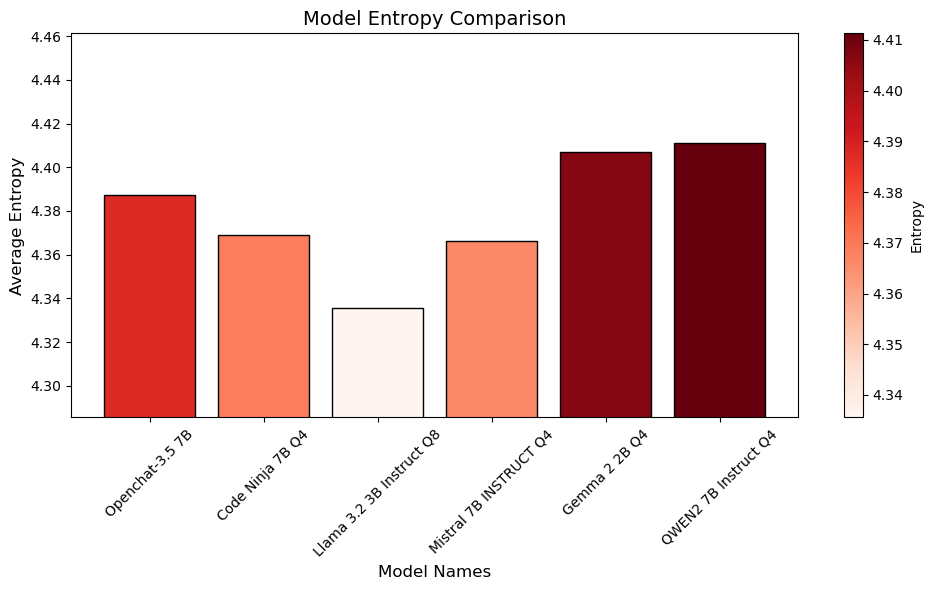

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and entropy values
models = ['Openchat-3.5 7B', 'Code Ninja 7B Q4', 'Llama 3.2 3B Instruct Q8', 
          'Mistral 7B INSTRUCT Q4', 'Gemma 2 2B Q4', 'QWEN2 7B Instruct Q4']
entropy_values = [4.3875, 4.3688, 4.3356, 4.3661, 4.4068, 4.41128]

# Normalize the entropy values for color scaling
norm = plt.Normalize(min(entropy_values), max(entropy_values))
cmap = plt.get_cmap('Reds')  # Using red gradient

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Explicitly define figure and axes

# Create the bars with color mapping based on entropy values
bars = ax.bar(models, entropy_values, color=cmap(norm(entropy_values)), edgecolor='black')

# Add labels and title
ax.set_xlabel('Model Names', fontsize=12)
ax.set_ylabel('Average Entropy', fontsize=12)
ax.set_title('Model Entropy Comparison', fontsize=14)
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

# Adjust the y-axis limits to show Llama model properly
ax.set_ylim(min(entropy_values) - 0.05, max(entropy_values) + 0.05)

# Add color bar for entropy gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set this to an empty array
fig.colorbar(sm, ax=ax, label='Entropy')  # Pass the axes explicitly to the colorbar

# Save the plot to a file
output_path = "model_entropy_comparison.png"  # Specify your desired file path
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # High resolution and no cropping

# Display the plot
plt.tight_layout()
plt.show()


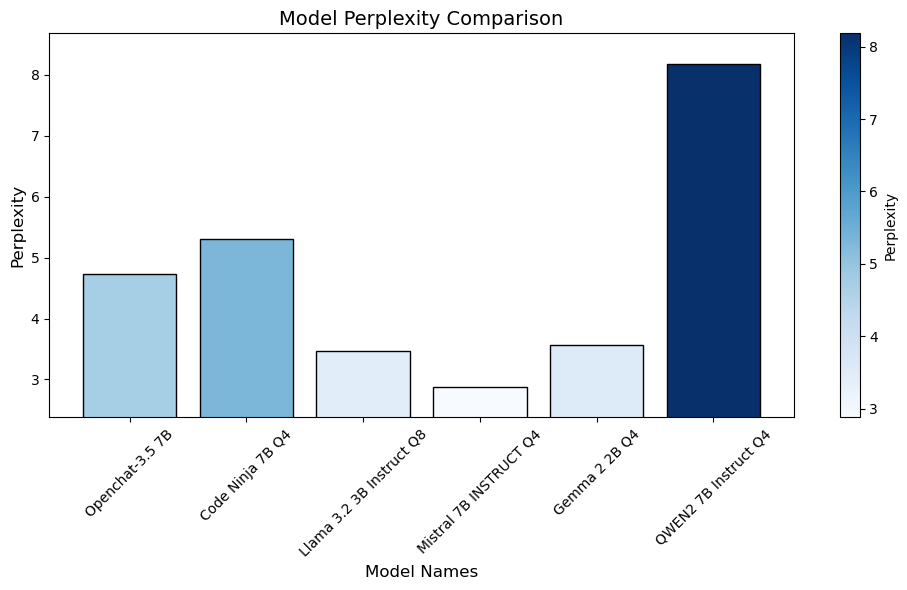

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and perplexity values
models = ['Openchat-3.5 7B', 'Code Ninja 7B Q4', 'Llama 3.2 3B Instruct Q8', 
          'Mistral 7B INSTRUCT Q4', 'Gemma 2 2B Q4', 'QWEN2 7B Instruct Q4']
perplexity_values = [4.7298, 5.3079, 3.4677, 2.8783, 3.57137, 8.18382]

# Normalize the perplexity values for color scaling
norm = plt.Normalize(min(perplexity_values), max(perplexity_values))
cmap = plt.get_cmap('Blues')  # Using blue gradient

# Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bars with color mapping based on perplexity values
bars = ax.bar(models, perplexity_values, color=cmap(norm(perplexity_values)), edgecolor='black')

# Add labels and title
ax.set_xlabel('Model Names', fontsize=12)
ax.set_ylabel('Perplexity', fontsize=12)
ax.set_title('Model Perplexity Comparison', fontsize=14)
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Adjust the y-axis limits for better visualization
ax.set_ylim(min(perplexity_values) - 0.5, max(perplexity_values) + 0.5)

# Add color bar for perplexity gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary to create the color bar
fig.colorbar(sm, ax=ax, label='Perplexity')  # Associate the color bar with the axes

# Save the plot to a file
output_path = "model_perplexity_comparison.png"  # Specify your desired file path
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # High resolution and no cropping

# Display the plot
plt.tight_layout()
plt.show()
